# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [28]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("classic")
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351250 entries, 0 to 2351249
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21100
Address                             12
Zip Code                         14664
Council District                 47639
APD Sector                        9340
APD District                      9828
PRA                              11149
Census Tract                    882977
Clearance Status                612516
Clearance Date                  343329
UCR Category                   1547012
Category Description           1547012
X-coordinate                     10535
Y-coordinate                     10535
Latitude                         39917
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number     Highest Offense Description  \
2351245      20113140947              ROBBERY BY ASSAULT   
2351246    2003924743563             BURGLARY OF VEHICLE   
2351247       2005370363  ASSAULT W/INJURY-FAM/DATE VIOL   
2351248      20153031816                           THEFT   
2351249       2007320198                             DWI   

         Highest Offense Code Family Violence      Occurred Date Time  \
2351245                   303               N  11/07/2011 03:00:00 PM   
2351246                   601               N  05/29/2003 08:00:00 AM   
2351247                   900               N  02/06/2005 02:52:00 AM   
2351248                   600               N  10/30/2015 04:44:00 PM   
2351249                  2100               N  02/01/2007 03:04:00 AM   

        Occurred Date  Occurred Time        Report Date Time Report Date  \
2351245    11/07/2011         1500.0  11/10/2011 02:09:00 PM  11/10/2011   
2351246    05/29/2003          800.0  05/29/2003 12:36:00 PM  05/29/2003   
2351247    02/06/2005          252.0  02/06/2005 02:52:00 AM  02/06/2005   
2351248    10/30/2015         1644.0  10/30/2015 04:44:00 PM  10/30/2015   
2351249    02/01/2007          304.0  02/01/2007 03:04:00 AM  02/01/2007   

         Report Time                 Location Type  \
2351245       1409.0  STREETS / HWY / ROAD / ALLEY   
2351246       1236.0         PARKING LOTS / GARAGE   
2351247        252.0              RESIDENCE / HOME   
2351248       1644.0         GROCERY / SUPERMARKET   
2351249        304.0  STREETS / HWY / ROAD / ALLEY   

                            Address  Zip Code  Council District APD Sector  \
2351245  BRODIE LN / W SLAUGHTER LN   78748.0               5.0         DA   
2351246              1000 E 41ST ST   78751.0               9.0         BA   
2351247             6201 BERKMAN DR   78723.0               1.0         ID   
2351248         2400 S CONGRESS AVE   78704.0               3.0         DA   
2351249    1900 E WILLIAM CANNON DR   78744.0               2.0         FR   

        APD District    PRA  Census Tract Clearance Status Clearance Date  \
2351245            7   89.0           NaN                N     01/02/2012   
2351246            5  332.0           NaN                N     05/30/2003   
2351247            3  294.0         21.12                C     02/07/2005   
2351248            2  475.0           NaN                C     11/02/2015   
2351249            8  516.0           NaN                C     02/01/2007   

        UCR Category Category Description  X-coordinate  Y-coordinate  \
2351245          120              Robbery     3081231.0     3081231.0   
2351246          23F                Theft     3121344.0     3121344.0   
2351247          NaN                  NaN     3130170.0     3130170.0   
2351248          23H                Theft     3110844.0     3110844.0   
2351249          NaN                  NaN     3107994.0     3107994.0   

          Latitude  Longitude                     Location  
2351245  30.183547 -97.849801  (30.18354694, -97.84980077)  
2351246  30.300461 -97.719652  (30.30046112, -97.71965166)  
2351247  30.315798 -97.691257   (30.31579812, -97.6912568)  
2351248  30.238291 -97.754594  (30.23829084, -97.75459354)  
2351249  30.188468 -97.764946  (30.18846792, -97.76494609)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

701

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2350549 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          INDECENCY WITH A CHILD/CONTACT            True   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   

                      report_date_time                    location_type  \
occurred_date_time                                                        
2003-01-01         2010-04-14 14:59:00                 RESIDENCE / HOME   
2003-01-01         2007-05-10 09:52:00                 RESIDENCE / HOME   
2003-01-01         2011-02-08 15:14:00                 RESIDENCE / HOME   
2003-01-01         2012-01-23 09:41:00  SPECIALTY  STORE (TV  FUR ETC.)   
2003-01-01         2009-08-07 14:23:00                 RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
2003-01-01                        1088 PARK PLZ  78753.0              4.0   
2003-01-01          9400 BLOCK GROUSE MEADOW LN  78758.0              4.0   
2003-01-01                         8220 W SH 71  78735.0              8.0   
2003-01-01                1533 CUTTING HORSE LN  78727.0              7.0   
2003-01-01                      6800 MC NEIL DR  78729.0              6.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 ED            3  251.0          NaN   
2003-01-01                 ED            1  238.0          NaN   
2003-01-01                 DA            6   61.0        19.08   
2003-01-01                 ED            4  193.0          NaN   
2003-01-01                 AD            4  169.0       204.10   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                     True     2010-04-15                  NaN   
2003-01-01                     True     2007-07-02                  NaN   
2003-01-01                    False     2011-05-23                  NaN   
2003-01-01                    False     2012-01-23                  NaN   
2003-01-01                      NaN            NaT                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.348871 -97.685233  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.246747 -97.887325  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.416668 -97.683656  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.438983 -97.759669  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                               
NaT                        BURGLARY OF VEHICLE           False   
NaT                        DISTURBANCE - OTHER           False   
NaT                                 AUTO THEFT           False   
NaT                          CRIMINAL MISCHIEF           False   
NaT                           DAMAGE CITY PROP           False   

                      report_date_time          location_type  \
occurred_date_time                                              
NaT                2003-03-24 08:26:00  PARKING LOTS / GARAGE   
NaT                2006-02-11 01:37:00                    NaN   
NaT                2003-01-17 23:05:00  PARKING LOTS / GARAGE   
NaT                2003-04-13 08:46:00  PARKING LOTS / GARAGE   
NaT                2006-12-13 02:19:00                    NaN   

                                      address zip_code council_district  \
occurred_date_time                                                        
NaT                     8800 N I 35 SB SVC RD  78753.0              4.0   
NaT                   RED RIVER ST / E 7TH ST  78701.0              9.0   
NaT                 6855 E US 290 HWY SVRD EB  78723.0              1.0   
NaT                          9801 W PARMER LN  78717.0              6.0   
NaT                         812 SPRINGDALE RD  78702.0              3.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ID            2  250.0          NaN   
NaT                        GE            2  382.0          NaN   
NaT                        ID            3  294.0          NaN   
NaT                        AD            5  574.0          NaN   
NaT                        CH            2  422.0          NaN   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False            NaT                Theft   
NaT                             NaN     2006-04-20                  NaN   
NaT                           False            NaT           Auto Theft   
NaT                           False            NaT                  NaN   
NaT                           False     2007-02-13                  NaN   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.352849 -97.691828   NaN    NaN   NaN  NaN   NaN  
NaT                 30.267402 -97.736823   NaN    NaN   NaN  NaN   NaN  
NaT                 30.320667 -97.687671   NaN    NaN   NaN  NaN   NaN  
NaT                 30.485438 -97.771709   NaN    NaN   NaN  NaN   NaN  
NaT                 30.258932 -97.699980   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    210894
78753.0    182310
78701.0    171887
78758.0    162827
78704.0    157958
78745.0    152617
78702.0    138371
78744.0    128457
78723.0    121426
78752.0     86013
78748.0     70174
78759.0     69498
78751.0     65317
78705.0     58251
78757.0     58166
78721.0     47762
78749.0     41220
78724.0     38372
78727.0     36868
78703.0     35781
78731.0     29609
78746.0     29179
78729.0     26102
78750.0     24213
78754.0     23821

zip_code
78741.0  0.090284
78753.0  0.078047
78701.0  0.073585
78758.0  0.069707
78704.0  0.067622
78745.0  0.065336
78702.0  0.059237
78744.0  0.054993
78723.0  0.051983
78752.0  0.036822
78748.0  0.030042
78759.0  0.029752
78751.0  0.027962
78705.0  0.024937
78757.0  0.024901
78721.0  0.020447
78749.0  0.017646
78724.0  0.016427
78727.0  0.015783
78703.0  0.015318
78731.0  0.012676
78746.0  0.012492
78729.0  0.011174
78750.0  0.010366
78754.0  0.010198

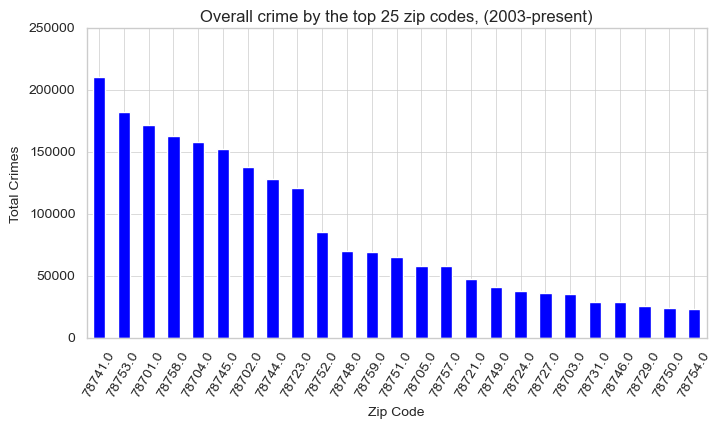

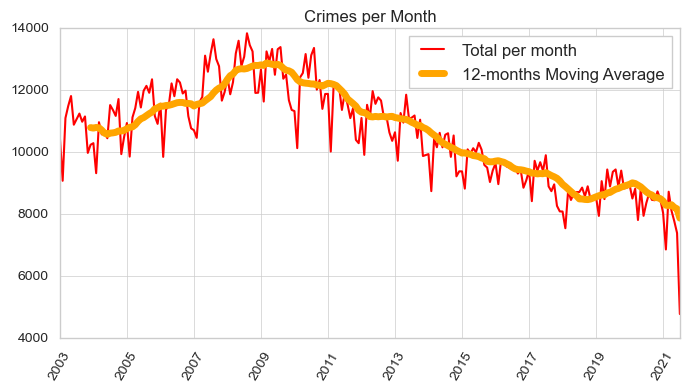

In [29]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  233256
THEFT                                                214571
FAMILY DISTURBANCE                                   184463
CRIMINAL MISCHIEF                                    129832
ASSAULT W/INJURY-FAM/DATE VIOL                        79572
BURGLARY OF RESIDENCE                                 77953
DWI                                                   70365
PUBLIC INTOXICATION                                   69137
HARASSMENT                                            65295
DISTURBANCE - OTHER                                   62810

BURGLARY OF VEHICLE  HARASSMENT  CRIMINAL MISCHIEF  \
occurred_date_time                                                       
2003-01-31                         1225         293                722   
2003-02-28                         1110         309                594   
2003-03-31                         1222         363                700   
2003-04-30                         1396         353                709   
2003-05-31                         1487         345                750   
...                                 ...         ...                ...   
2021-03-31                          432         197                431   
2021-04-30                          370         171                419   
2021-05-31                          349         146                397   
2021-06-30                          353         159                373   
2021-07-31                          257          78                245   

                    ASSAULT W/INJURY-FAM/DATE VIOL  BURGLARY OF RESIDENCE  \
occurred_date_time                                                          
2003-01-31                                     349                    328   
2003-02-28                                     342                    248   
2003-03-31                                     421                    393   
2003-04-30                                     432                    398   
2003-05-31                                     424                    436   
...                                            ...                    ...   
2021-03-31                                     260                    155   
2021-04-30                                     268                    127   
2021-05-31                                     313                    155   
2021-06-30                                     268                    147   
2021-07-31                                     192                    110   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  408                 505   4171  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-03-31                           75  179                 878   2607  
2021-04-30                           67  126                 799   2347  
2021-05-31                           61  133                 885   2439  
2021-06-30                           70  126                 799   2295  
2021-07-31                           49   80                 595   1606  

[223 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

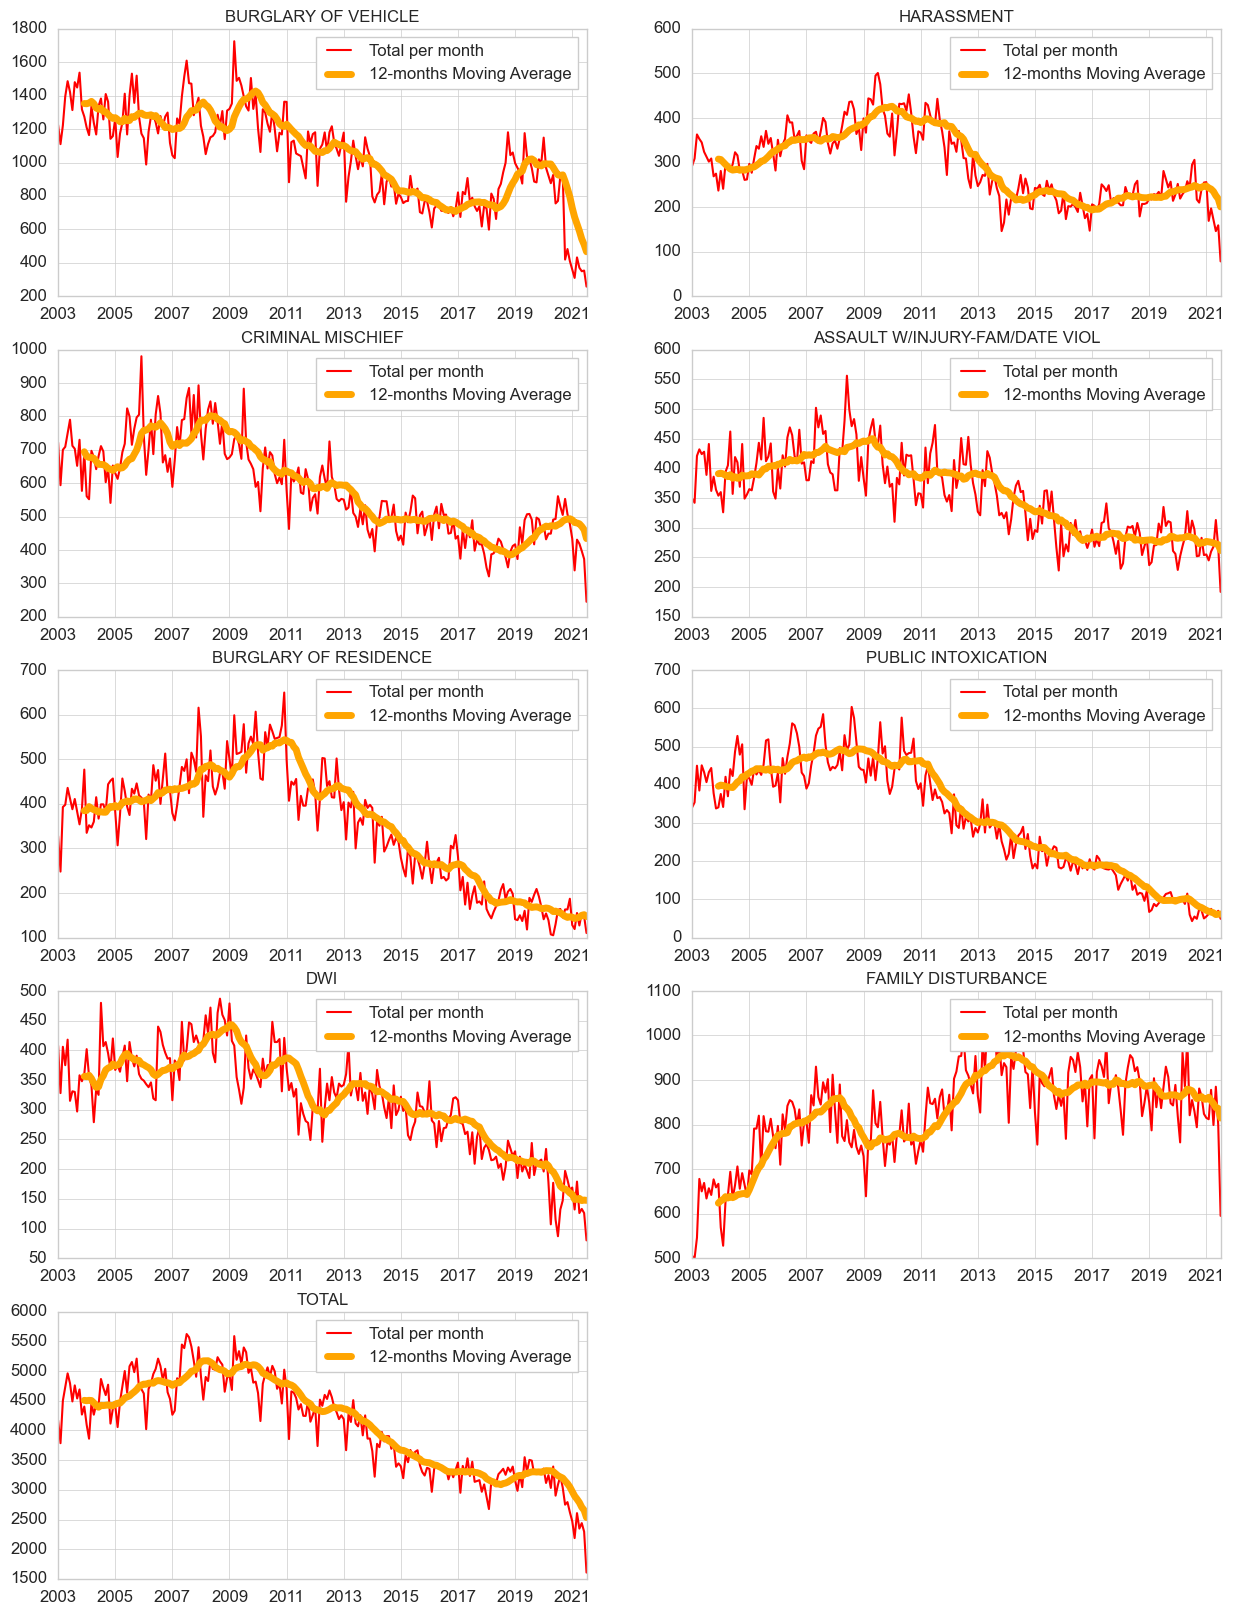

In [34]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17262
THEFT                                                 16039
BURGLARY OF VEHICLE                                    9450
WARRANT ARREST NON TRAFFIC                             9017
DWI                                                    8438
ASSAULT WITH INJURY                                    7737
VIOL CITY ORDINANCE - OTHER                            6221
POSS OF DRUG PARAPHERNALIA                             6147
CRIMINAL MISCHIEF                                      5999
CRIMINAL TRESPASS                                      3999
POSSESSION OF MARIJUANA                                3428
DISTURBANCE - OTHER                                    3427
CUSTODY ARREST TRAFFIC WARR                            3006
POSS CONTROLLED SUB/NARCOTIC                           2948
CAMPING IN PARK                                        2799
VOCO - ALCOHOL  CONSUMPTION                            2705
ASSAULT BY CONTACT                                     2672
CRIMINAL TRESPASS/TRANSIENT                            2605
THEFT OF BICYCLE                                       2579
URINATING IN PUBLIC PLACE                              2352
FAMILY DISTURBANCE                                     2246
DOC FIGHTING                                           2162
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1762

highest_offense_description
PUBLIC INTOXICATION                                0.100426
THEFT                                              0.093311
BURGLARY OF VEHICLE                                0.054978
WARRANT ARREST NON TRAFFIC                         0.052459
DWI                                                0.049090
ASSAULT WITH INJURY                                0.045012
VIOL CITY ORDINANCE - OTHER                        0.036192
POSS OF DRUG PARAPHERNALIA                         0.035762
CRIMINAL MISCHIEF                                  0.034901
CRIMINAL TRESPASS                                  0.023265
POSSESSION OF MARIJUANA                            0.019943
DISTURBANCE - OTHER                                0.019938
CUSTODY ARREST TRAFFIC WARR                        0.017488
POSS CONTROLLED SUB/NARCOTIC                       0.017151
CAMPING IN PARK                                    0.016284
VOCO - ALCOHOL  CONSUMPTION                        0.015737
ASSAULT BY CONTACT                                 0.015545
CRIMINAL TRESPASS/TRANSIENT                        0.015155
THEFT OF BICYCLE                                   0.015004
URINATING IN PUBLIC PLACE                          0.013683
FAMILY DISTURBANCE                                 0.013067
DOC FIGHTING                                       0.012578
PROTECTIVE ORDER                                   0.012212
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010251

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

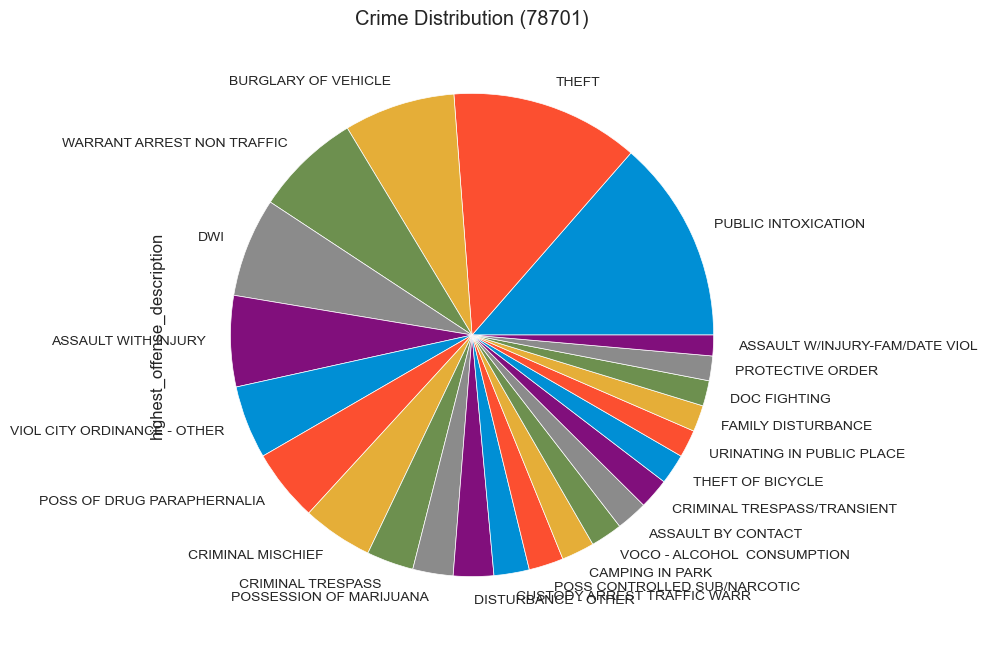

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17324
BURGLARY OF VEHICLE                                   16065
FAMILY DISTURBANCE                                    15051
CRIMINAL MISCHIEF                                      9630
THEFT BY SHOPLIFTING                                   7727
ASSAULT W/INJURY-FAM/DATE VIOL                         7312
BURGLARY OF RESIDENCE                                  6134
DWI                                                    5038
DISTURBANCE - OTHER                                    4871
AUTO THEFT                                             4377
HARASSMENT                                             4329
CUSTODY ARREST TRAFFIC WARR                            4325
POSS OF DRUG PARAPHERNALIA                             3736
ASSAULT WITH INJURY                                    3411
PUBLIC INTOXICATION                                    3382
CRIMINAL TRESPASS                                      3201
POSS CONTROLLED SUB/NARCOTIC                           3023
RUNAWAY CHILD                                          2978
WARRANT ARREST NON TRAFFIC                             2770
POSSESSION OF MARIJUANA                                2700
BURGLARY NON RESIDENCE                                 2537
VIOL CITY ORDINANCE - OTHER                            1859

----------------------------------


highest_offense_description
THEFT                                              0.095025
BURGLARY OF VEHICLE                                0.088119
FAMILY DISTURBANCE                                 0.082557
CRIMINAL MISCHIEF                                  0.052822
THEFT BY SHOPLIFTING                               0.042384
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040108
BURGLARY OF RESIDENCE                              0.033646
DWI                                                0.027634
DISTURBANCE - OTHER                                0.026718
AUTO THEFT                                         0.024009
HARASSMENT                                         0.023745
CUSTODY ARREST TRAFFIC WARR                        0.023723
POSS OF DRUG PARAPHERNALIA                         0.020493
ASSAULT WITH INJURY                                0.018710
PUBLIC INTOXICATION                                0.018551
CRIMINAL TRESPASS                                  0.017558
POSS CONTROLLED SUB/NARCOTIC                       0.016582
RUNAWAY CHILD                                      0.016335
WARRANT ARREST NON TRAFFIC                         0.015194
POSSESSION OF MARIJUANA                            0.014810
BURGLARY NON RESIDENCE                             0.013916
VIOL CITY ORDINANCE - OTHER                        0.010197

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

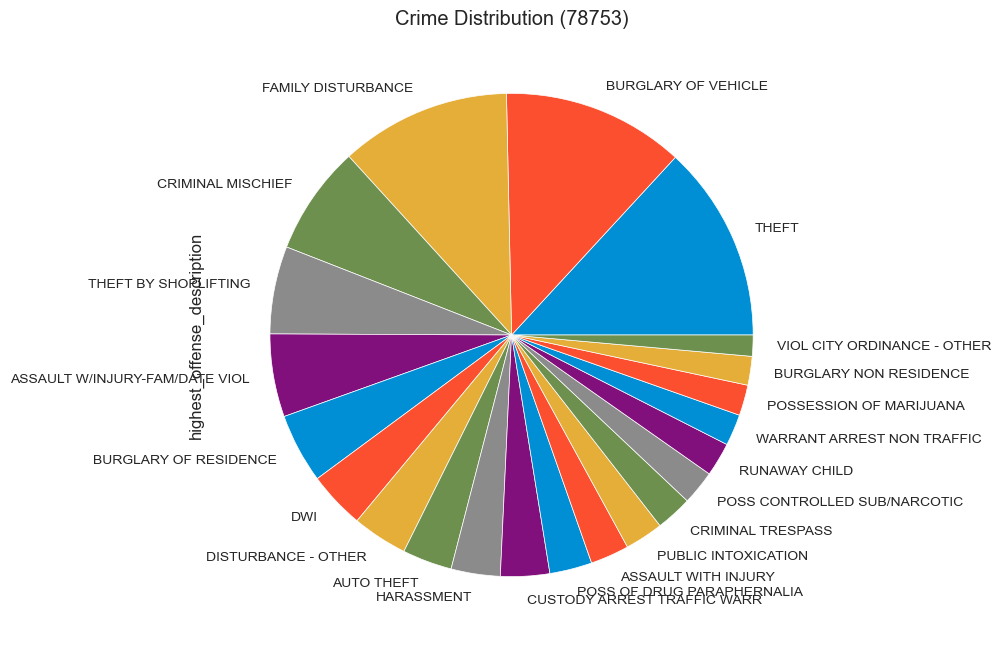

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20807
BURGLARY OF VEHICLE                                   20011
THEFT                                                 15819
CRIMINAL MISCHIEF                                     11219
ASSAULT W/INJURY-FAM/DATE VIOL                         9771
BURGLARY OF RESIDENCE                                  8992
PUBLIC INTOXICATION                                    6422
CUSTODY ARREST TRAFFIC WARR                            6033
DWI                                                    5752
HARASSMENT                                             5615
DISTURBANCE - OTHER                                    5269
AUTO THEFT                                             4796
ASSAULT WITH INJURY                                    4630
CRIMINAL TRESPASS                                      4011
POSS CONTROLLED SUB/NARCOTIC                           3937
POSSESSION OF MARIJUANA                                3817
THEFT BY SHOPLIFTING                                   3611
POSS OF DRUG PARAPHERNALIA                             3570
WARRANT ARREST NON TRAFFIC                             3476
RUNAWAY CHILD                                          2817
VIOL CITY ORDINANCE - OTHER                            2202

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098661
BURGLARY OF VEHICLE                                0.094887
THEFT                                              0.075009
CRIMINAL MISCHIEF                                  0.053197
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046331
BURGLARY OF RESIDENCE                              0.042638
PUBLIC INTOXICATION                                0.030451
CUSTODY ARREST TRAFFIC WARR                        0.028607
DWI                                                0.027274
HARASSMENT                                         0.026625
DISTURBANCE - OTHER                                0.024984
AUTO THEFT                                         0.022741
ASSAULT WITH INJURY                                0.021954
CRIMINAL TRESPASS                                  0.019019
POSS CONTROLLED SUB/NARCOTIC                       0.018668
POSSESSION OF MARIJUANA                            0.018099
THEFT BY SHOPLIFTING                               0.017122
POSS OF DRUG PARAPHERNALIA                         0.016928
WARRANT ARREST NON TRAFFIC                         0.016482
RUNAWAY CHILD                                      0.013357
VIOL CITY ORDINANCE - OTHER                        0.010441

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

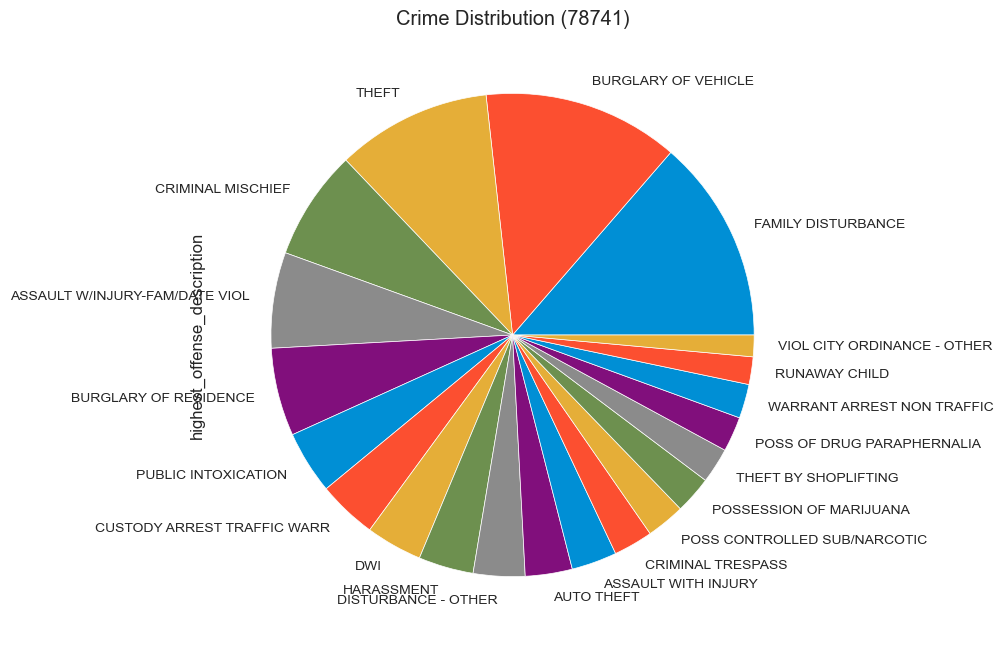

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15298
BURGLARY OF VEHICLE                                   14794
THEFT                                                 13511
CRIMINAL MISCHIEF                                      8652
BURGLARY OF RESIDENCE                                  5903
ASSAULT W/INJURY-FAM/DATE VIOL                         5843
HARASSMENT                                             5191
DISTURBANCE - OTHER                                    4590
DWI                                                    4433
PUBLIC INTOXICATION                                    4007
CUSTODY ARREST TRAFFIC WARR                            3226
AUTO THEFT                                             2944
BURGLARY NON RESIDENCE                                 2906
ASSAULT WITH INJURY                                    2737
RUNAWAY CHILD                                          2625
POSSESSION OF MARIJUANA                                2586
WARRANT ARREST NON TRAFFIC                             2091
POSS CONTROLLED SUB/NARCOTIC                           2047
CRIMINAL TRESPASS                                      1960
THEFT BY SHOPLIFTING                                   1739
IDENTITY THEFT                                         1681
POSS OF DRUG PARAPHERNALIA                             1532

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.100238
BURGLARY OF VEHICLE                                0.096935
THEFT                                              0.088529
CRIMINAL MISCHIEF                                  0.056691
BURGLARY OF RESIDENCE                              0.038679
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038285
HARASSMENT                                         0.034013
DISTURBANCE - OTHER                                0.030075
DWI                                                0.029047
PUBLIC INTOXICATION                                0.026255
CUSTODY ARREST TRAFFIC WARR                        0.021138
AUTO THEFT                                         0.019290
BURGLARY NON RESIDENCE                             0.019041
ASSAULT WITH INJURY                                0.017934
RUNAWAY CHILD                                      0.017200
POSSESSION OF MARIJUANA                            0.016944
WARRANT ARREST NON TRAFFIC                         0.013701
POSS CONTROLLED SUB/NARCOTIC                       0.013413
CRIMINAL TRESPASS                                  0.012843
THEFT BY SHOPLIFTING                               0.011395
IDENTITY THEFT                                     0.011015
POSS OF DRUG PARAPHERNALIA                         0.010038

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

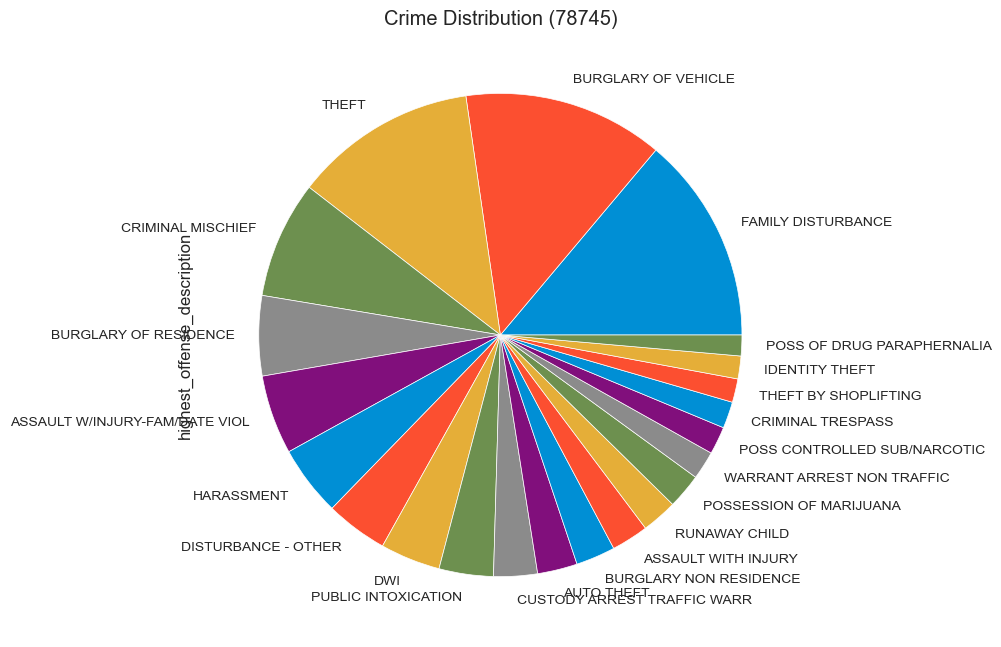

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8721
THEFT                                                  5670
CRIMINAL MISCHIEF                                      5032
THEFT OF BICYCLE                                       3553
PUBLIC INTOXICATION                                    2649
BURGLARY OF RESIDENCE                                  2143
WARRANT ARREST NON TRAFFIC                             1536
AUTO THEFT                                             1401
CRIMINAL TRESPASS                                      1381
ASSAULT WITH INJURY                                    1277
HARASSMENT                                             1241
FAMILY DISTURBANCE                                     1235
DWI                                                    1232
DISTURBANCE - OTHER                                    1140
BURGLARY NON RESIDENCE                                  895
CRIMINAL TRESPASS/TRANSIENT                             873
CUSTODY ARREST TRAFFIC WARR                             789
GRAFFITI                                                783
VIOL CITY ORDINANCE - OTHER                             773
ASSAULT W/INJURY-FAM/DATE VIOL                          713
POSSESSION OF MARIJUANA                                 676
ASSAULT BY CONTACT                                      628

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.149714
THEFT                                              0.097337
CRIMINAL MISCHIEF                                  0.086385
THEFT OF BICYCLE                                   0.060995
PUBLIC INTOXICATION                                0.045476
BURGLARY OF RESIDENCE                              0.036789
WARRANT ARREST NON TRAFFIC                         0.026369
AUTO THEFT                                         0.024051
CRIMINAL TRESPASS                                  0.023708
ASSAULT WITH INJURY                                0.021922
HARASSMENT                                         0.021304
FAMILY DISTURBANCE                                 0.021201
DWI                                                0.021150
DISTURBANCE - OTHER                                0.019570
BURGLARY NON RESIDENCE                             0.015365
CRIMINAL TRESPASS/TRANSIENT                        0.014987
CUSTODY ARREST TRAFFIC WARR                        0.013545
GRAFFITI                                           0.013442
VIOL CITY ORDINANCE - OTHER                        0.013270
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012240
POSSESSION OF MARIJUANA                            0.011605
ASSAULT BY CONTACT                                 0.010781

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

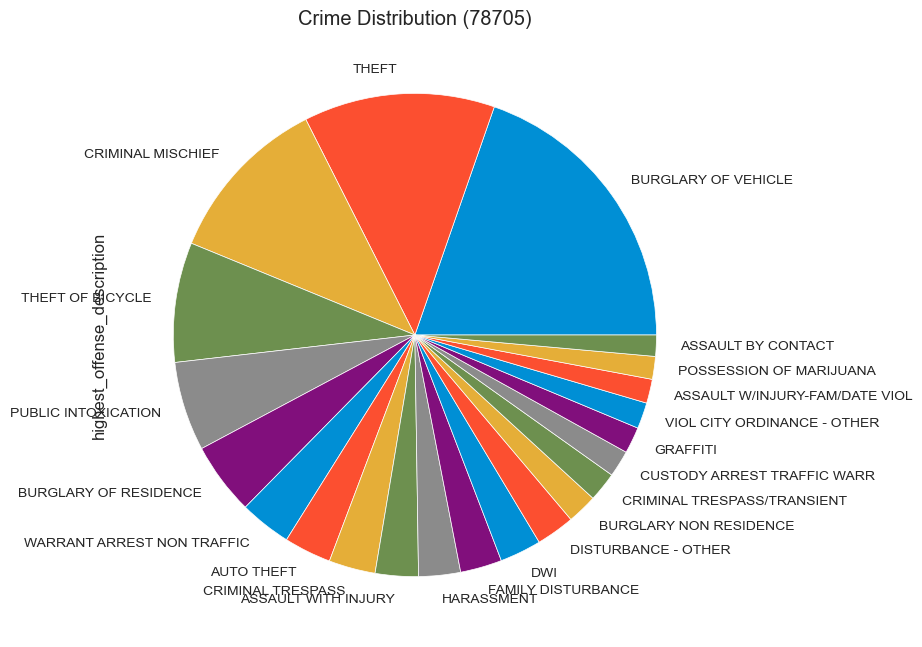

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5580
THEFT                                                  5358
THEFT BY SHOPLIFTING                                   2568
CRIMINAL MISCHIEF                                      1304
DWI                                                     898
FAMILY DISTURBANCE                                      782
HARASSMENT                                              642
VIOL CITY ORDINANCE - OTHER                             642
AUTO THEFT                                              624
BURGLARY OF RESIDENCE                                   525
THEFT FROM PERSON                                       473
IDENTITY THEFT                                          456
DISTURBANCE - OTHER                                     454
BURGLARY NON RESIDENCE                                  374
ASSAULT W/INJURY-FAM/DATE VIOL                          346
CRED CARD ABUSE - OTHER                                 335
PUBLIC INTOXICATION                                     334
POSSESSION OF MARIJUANA                                 311
FRAUD - OTHER                                           285
SUSPICIOUS PERSON                                       264
CUSTODY ARREST TRAFFIC WARR                             248
THEFT OF BICYCLE                                        235
WARRANT ARREST NON TRAFFIC                              227
ASSAULT WITH INJURY                                     214

highest_offense_description
BURGLARY OF VEHICLE                                0.191233
THEFT                                              0.183625
THEFT BY SHOPLIFTING                               0.088008
CRIMINAL MISCHIEF                                  0.044690
DWI                                                0.030776
FAMILY DISTURBANCE                                 0.026800
HARASSMENT                                         0.022002
VIOL CITY ORDINANCE - OTHER                        0.022002
AUTO THEFT                                         0.021385
BURGLARY OF RESIDENCE                              0.017992
THEFT FROM PERSON                                  0.016210
IDENTITY THEFT                                     0.015628
DISTURBANCE - OTHER                                0.015559
BURGLARY NON RESIDENCE                             0.012817
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011858
CRED CARD ABUSE - OTHER                            0.011481
PUBLIC INTOXICATION                                0.011447
POSSESSION OF MARIJUANA                            0.010658
FRAUD - OTHER                                      0.009767
SUSPICIOUS PERSON                                  0.009048
CUSTODY ARREST TRAFFIC WARR                        0.008499
THEFT OF BICYCLE                                   0.008054
WARRANT ARREST NON TRAFFIC                         0.007780
ASSAULT WITH INJURY                                0.007334

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

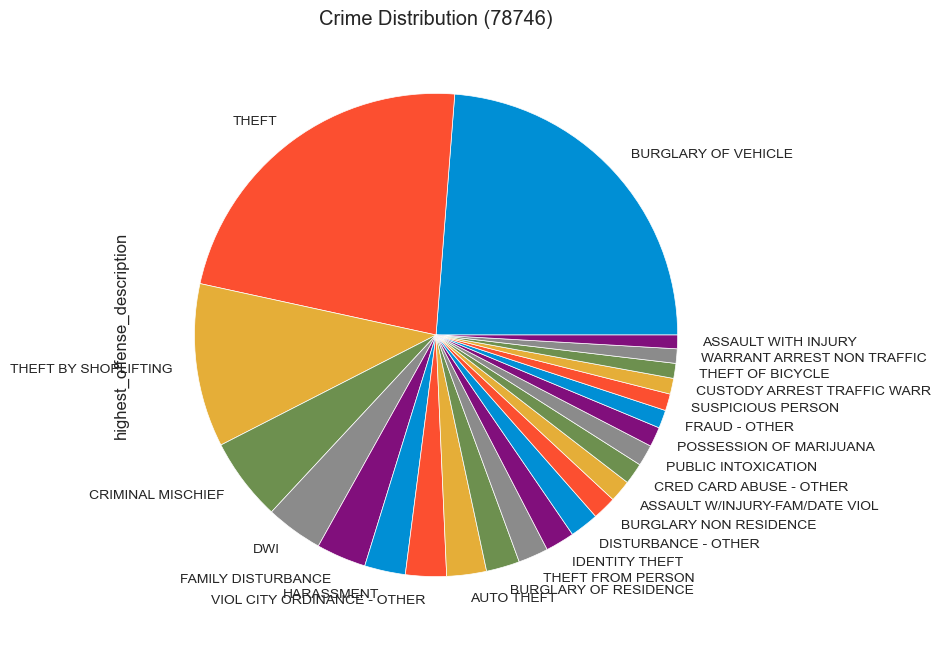

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

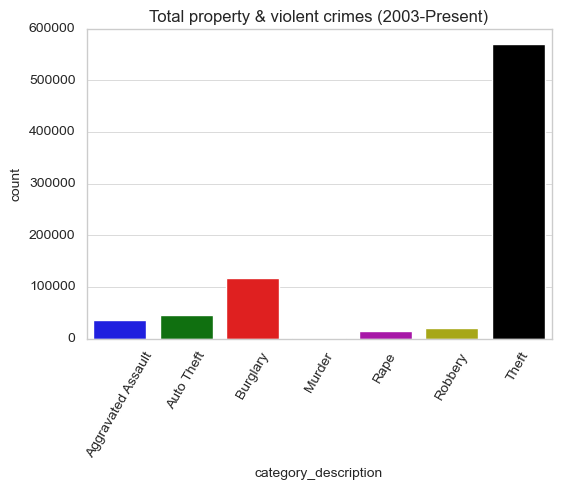

Theft                 570678
Burglary              117412
Auto Theft             45268
Aggravated Assault     35848
Robbery                20494
Rape                   13596
Murder                   559
Name: category_description, dtype: int64

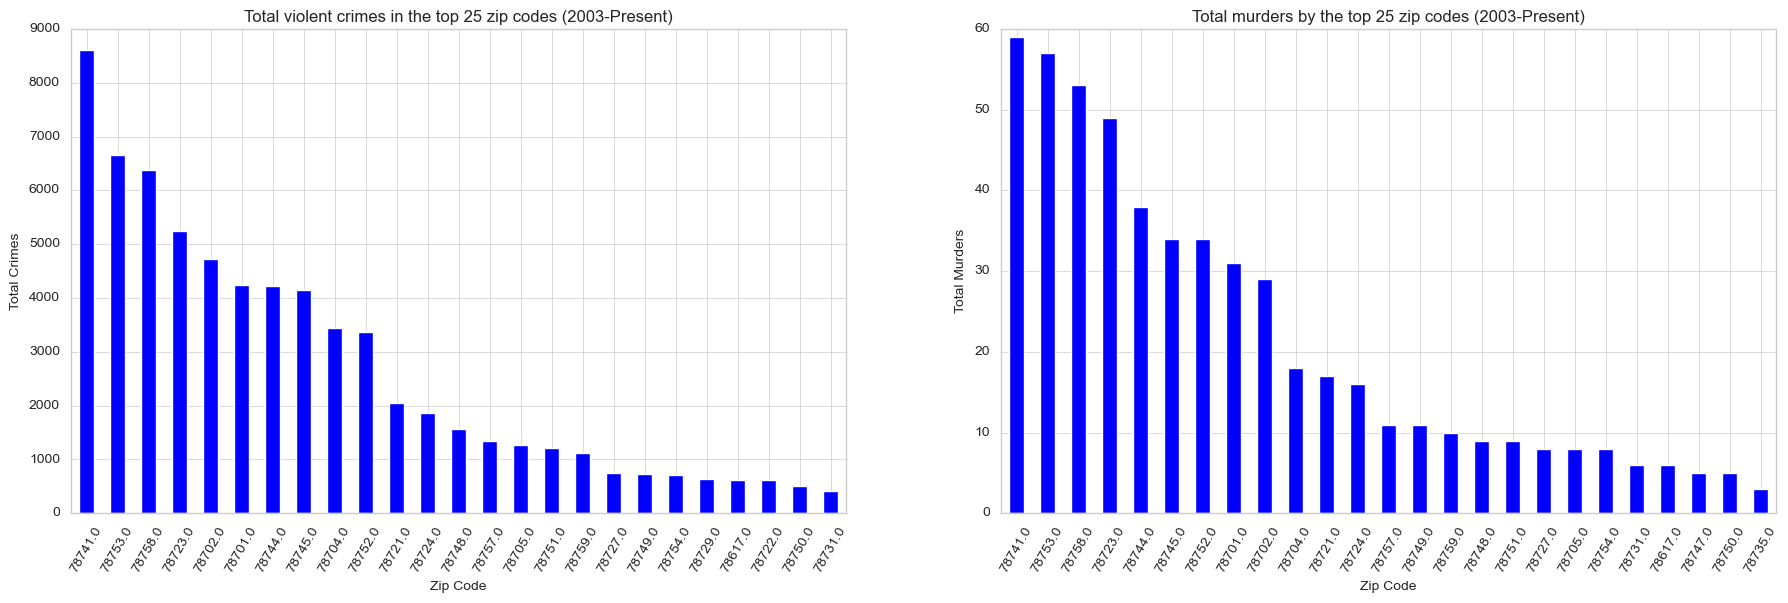

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    30       59
78617.0                              357       6   158      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                8       0     1        1
78653.0                               37       1     7        5
78660.0                              159       3    43       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2082      31   774     1363
78702.0                             2431      29   618     1652
78703.0                              165       2    85      113
78704.0                             1643      18   783      996
78705.0                              497       8   451      316
78712.0                                2       0     3        1
78717.0                              153       1    46       39
78719.0                               26       0     3       10
78721.0                             1289      17   308      440
78722.0                              275       3    98      241
78723.0                             2619      49   812     1759
78724.0                             1153      16   357      340
78725.0                               77       1    42       13
78726.0                              176       2    93       32
78727.0                              419       8   177      153
78728.0                               21       1    12        3
78729.0                              341       2   151      137
78730.0                               34       0    17        3
78731.0                              191       6   119       90
78732.0                                3       0     2        2
78733.0                                2       0     5        1
78735.0                              223       3    76       47
78736.0                               59       0    31       14
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               36       0    39        3
78741.0                             4178      59  1371     3006
78742.0                               80       2    21       24
78744.0                             2359      38   896      939
78745.0                             2234      34   861     1019
78746.0                              129       3    79      134
78747.0                              239       5    96       45
78748.0                              851       9   381      322
78749.0                              363      11   205      146
78750.0                              259       5   139      106
78751.0                              533       9   279      391
78752.0                             1641      34   498     1196
78753.0                             3370      57  1135     2101
78754.0                              394       8   159      146
78756.0                              156       2    99       98
78757.0                              680      11   234      417
78758.0                             3146      53  1100     2082
78759.0                              566      10   258      287

<Figure size 432x288 with 0 Axes>

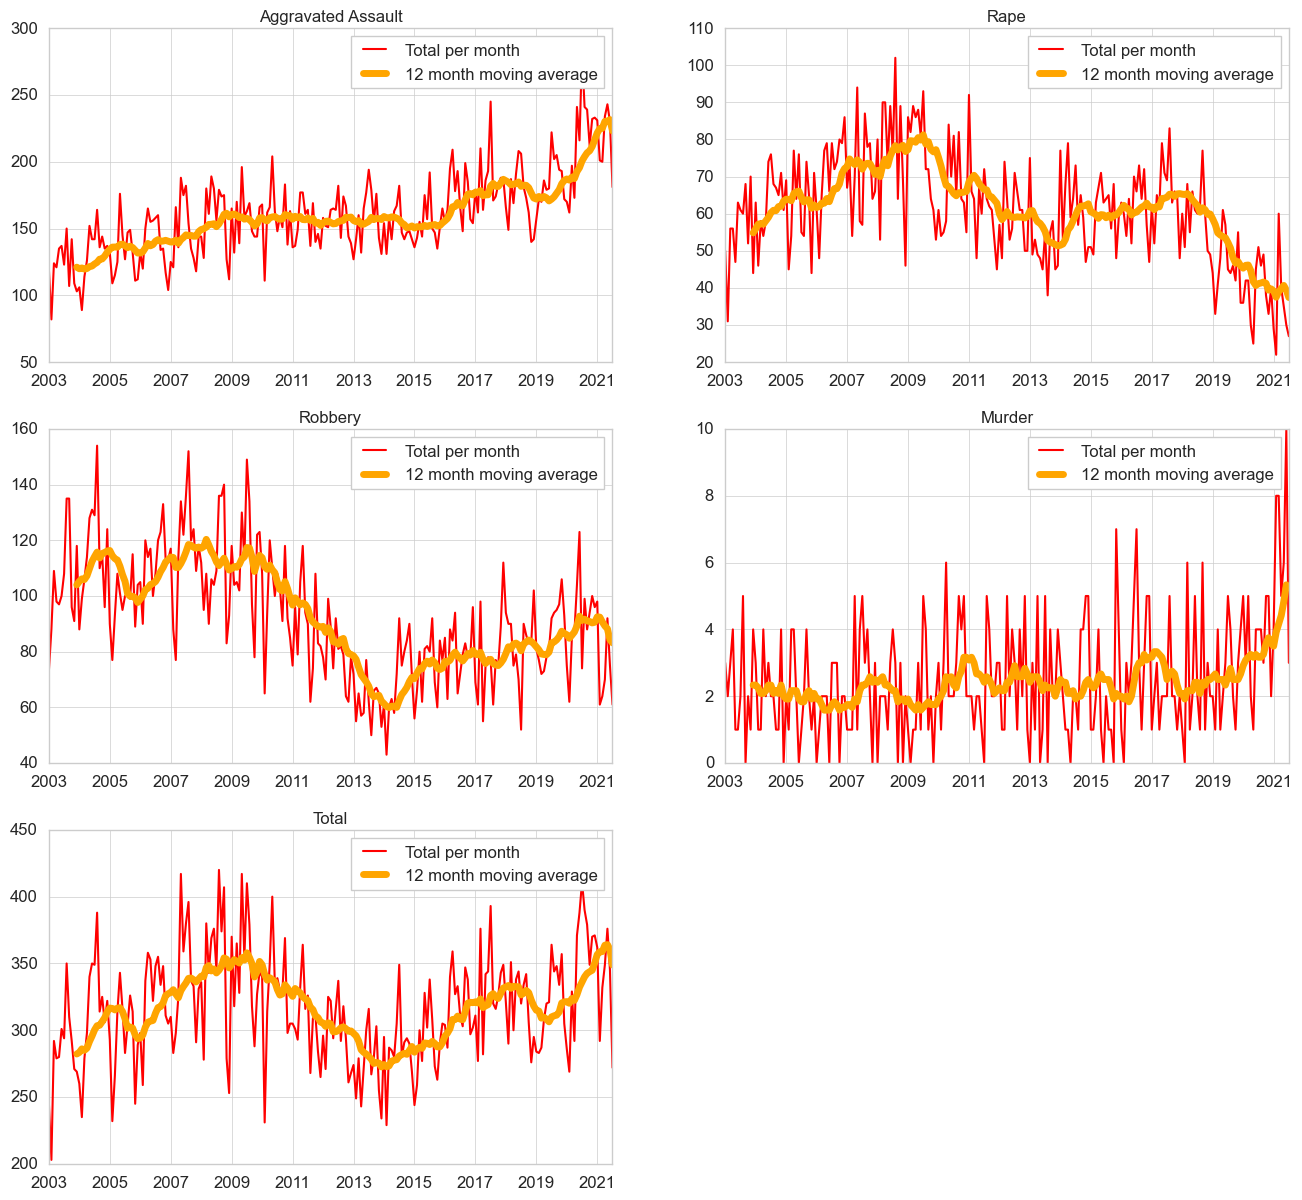

In [31]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

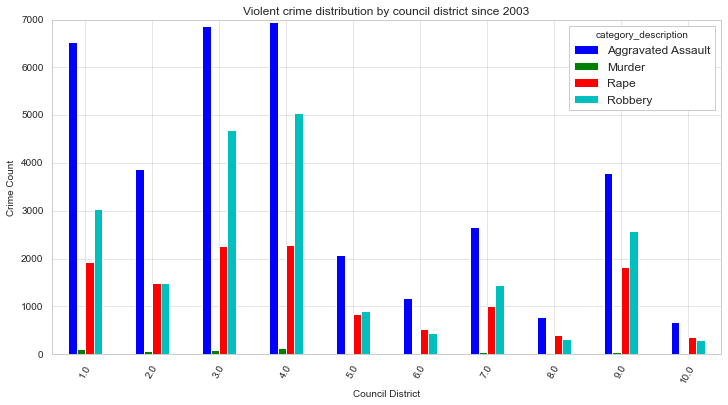

<Figure size 600x400 with 0 Axes>

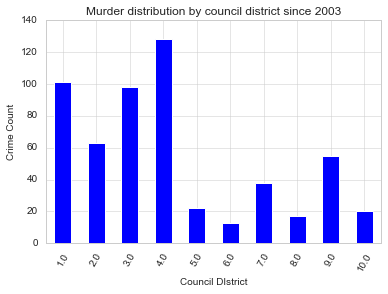

<Figure size 600x400 with 0 Axes>

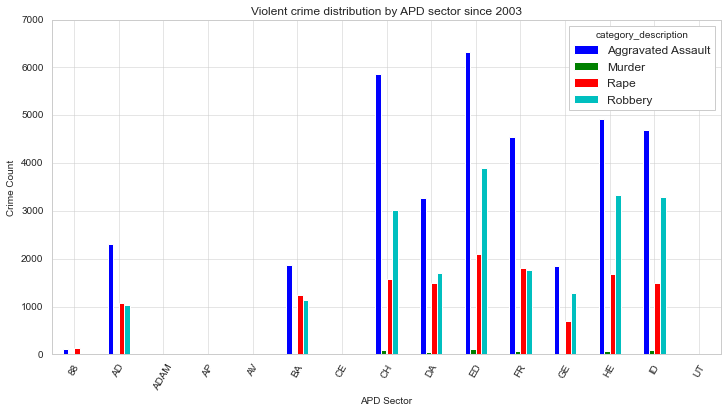

<Figure size 600x400 with 0 Axes>

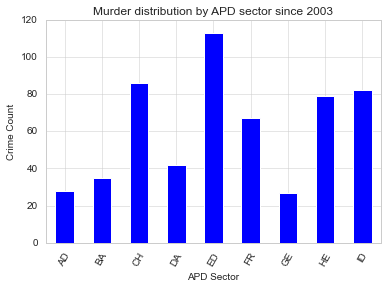

<Figure size 600x400 with 0 Axes>

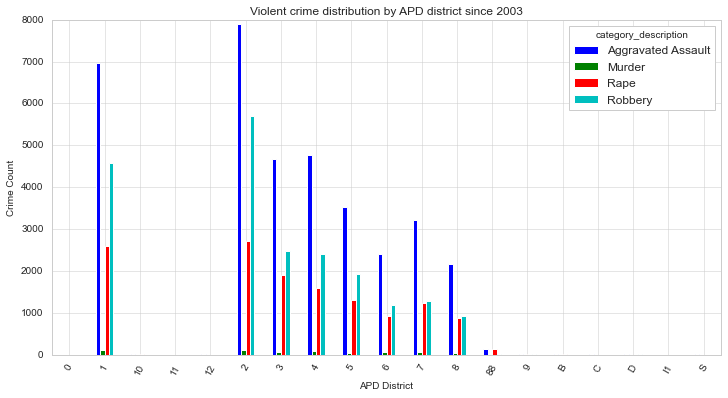

<Figure size 600x400 with 0 Axes>

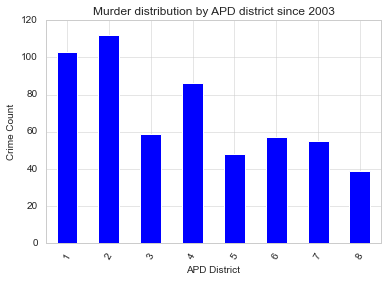

In [32]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               44       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   409       9   
COMMUNITY CENTER                                                10       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              288       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             123       6   
FIELD / WOODS                                                  291      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         273       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           783      15   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                470      13   
PARK / PLAYGROUND                                              188       1   
PARKING LOTS / GARAGE                                         4930     104   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17873     238   
REST AREA                                                        2       0   
RESTAURANTS                                                    259       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      23       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8406     113   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 110       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        9  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      398  
BAR / NIGHT CLUB                                 161   

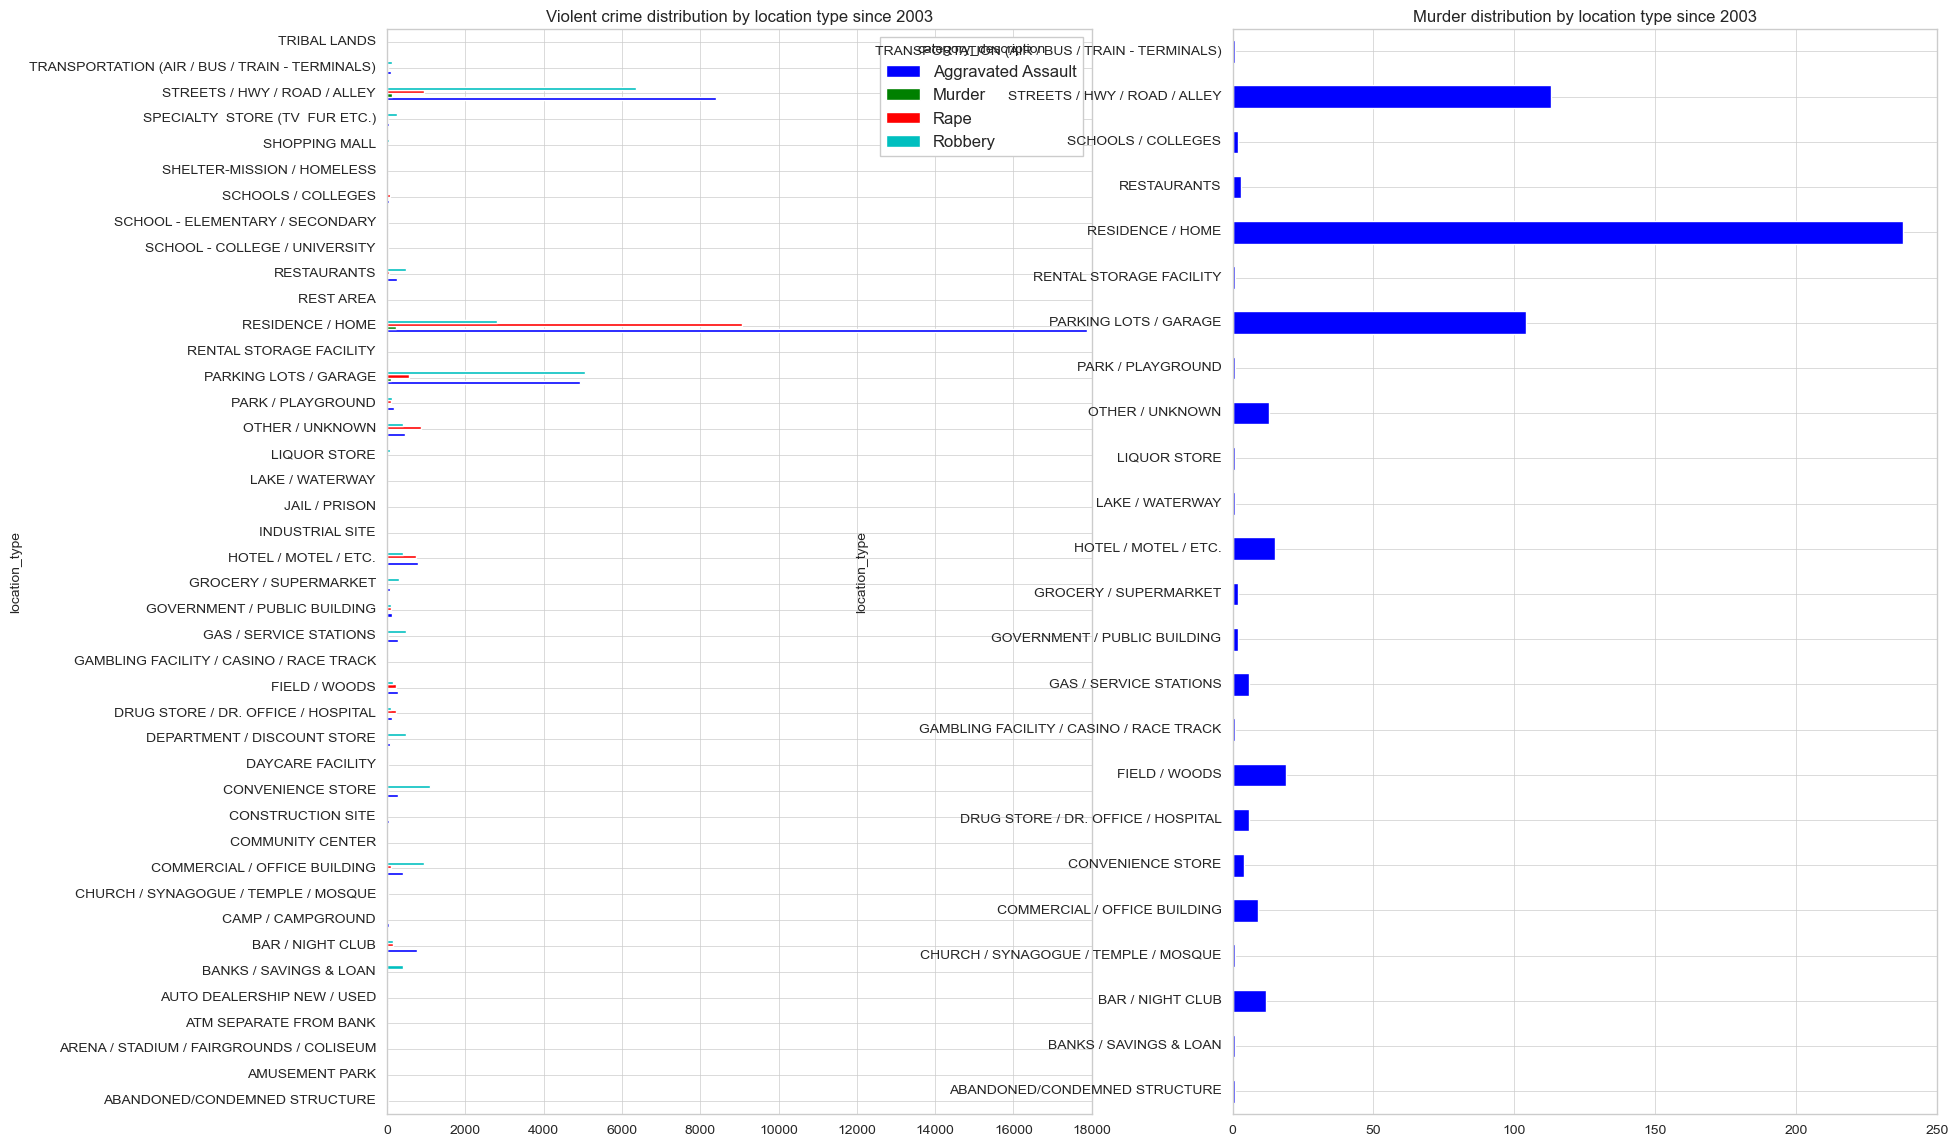

In [33]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    163
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      144
1030 NORWOOD PARK BLVD              135
500 E 7TH ST                        131
6409 SPRINGDALE RD                  131
1700 BURTON DR                      126
1071 CLAYTON LN                     116
9024 NORTHGATE BLVD                 111
6103 MANOR RD                       110
9200 NORTH PLZ                      107
1124 RUTLAND DR                     103
1054 SPRINGDALE RD                  103
2901 S CAPITAL OF TEXAS HWY NB       97
9601 MIDDLE FISKVILLE RD             96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
12151 N IH 35 SVRD NB                91
10000 N LAMAR BLVD                   91
6118 FAIRWAY ST                      91
1500 FARO DR                         91
7020 GRAND CANYON DR                 88
700 BLOCK E 8TH ST                   88
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
2401 S LAKESHORE BLVD                84
2500 BLOCK S CONGRESS AVE            84
9300 NORTHGATE BLVD                  84
2237 E RIVERSIDE DR                  84
8312 N IH 35 SVRD SB                 81
9010 GALEWOOD DR                     81
6855 E US 290 HWY SVRD EB            79
2201 WILLOW CREEK DR                 79
1300 CROSSING PL                     79
7000 DECKER LN                       79
3909 N IH 35 SVRD NB                 77
1845 BURTON DR                       75
9001 NORTHGATE BLVD                  75
2400 WICKERSHAM LN                   74
1601 ROYAL CREST DR                  73
4404 E OLTORF ST                     72
8926 N LAMAR BLVD                    72
4900 BLOCK MUELLER BLVD              72
2101 BURTON DR                       71
1600 WICKERSHAM LN                   69
2005 WILLOW CREEK DR                 69
2200 S PLEASANT VALLEY RD            68
3603 SOUTHRIDGE DR                   68
919 E 32ND ST                        67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
4700 E RIVERSIDE DR              3
6407 SPRINGDALE RD               3
6409 SPRINGDALE RD               3
601 E 15TH ST                    3
8610 N LAMAR BLVD                3
8800 N IH 35 SVRD SB             3
200 BLOCK E 6TH ST               2
2400 WICKERSHAM LN               2
201 W 5TH ST                     2
744 W WILLIAM CANNON DR          2
2713 S CONGRESS AVE              2
833 FAIRFIELD DR                 2
2501 ANKEN DR                    2
1711 RUTLAND DR                  2
605 MASTERSON PASS               2
4900 E OLTORF ST                 2
1200 BLOCK E 38TH HALF ST        2
1137 GUNTER ST                   2
9601 MIDDLE FISKVILLE RD         2
2508 E RIVERSIDE DR              2
9010 GALEWOOD DR                 2
7100 N IH 35 SVRD SB             2
9220 N IH 35 SVRD SB             2
815 W SLAUGHTER LN               2
6600 ED BLUESTEIN BLVD SB        2
9036 N LAMAR BLVD                2
8912 N LAMAR BLVD                2
11105 N IH 35 SVRD NB            2
7000 DECKER LN                   2
9200 NORTH PLZ                   2
7330 BLUFF SPRINGS RD            2
10503 N LAMAR BLVD               2
6118 FAIRWAY ST                  2
1050 SPRINGDALE RD               2
8225 SAM RAYBURN DR              2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")